In [2]:
import pandas as pd

In [3]:
data= pd.read_csv("city_day.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [15]:
# Function to Extract Monthly AQI Data for a Specific Year
def extract_monthly_aqi(data, year):
    if 'Date' not in data.columns or 'AQI' not in data.columns:
        raise ValueError("Dataset must contain 'Date' and 'AQI' columns.")
    data['Date'] = pd.to_datetime(data['Date'])
    yearly_data = data[data['Date'].dt.year == year]
    monthly_aqi = yearly_data.groupby(yearly_data['Date'].dt.month)['AQI'].mean()
    return monthly_aqi

# Example Usage
monthly_aqi_2020 = extract_monthly_aqi(data, 2020)
print("Monthly AQI for 2020:")
print(monthly_aqi_2020)

Monthly AQI for 2020:
Date
1    168.414806
2    158.175949
3    114.207819
4     92.852327
5     89.799164
6     81.305638
7     79.727968
Name: AQI, dtype: float64


In [16]:
# Clean and structure data by removing unnecessary columns.
# Convert 'Date' to datetime format 
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [17]:
# Checking for null values in each column
data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [18]:
data.shape

(29531, 16)

In [10]:
# Fill missing values (simple strategy: fill with mean)
data.fillna(data.mean(numeric_only=True), inplace=True)

In [19]:
data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [21]:
# Fill missing values in AQI_Bucket based on AQI ranges
def assign_aqi_bucket(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

data['AQI_Bucket'] = data['AQI_Bucket'].fillna(data['AQI'].apply(assign_aqi_bucket))

# Verify if missing values are handled
print(data['AQI_Bucket'].isnull().sum())


0


In [22]:
data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [25]:
data['Year'] = data['Date'].dt.year  # Extract Year
data['Month'] = data['Date'].dt.month  # Extract Month
data['Day'] = data['Date'].dt.day  # Extract Day
print("Extracted columns 'Year', 'Month', 'Day'. Sample:")
print(data[['Year', 'Month', 'Day']].head())

Extracted columns 'Year', 'Month', 'Day'. Sample:
   Year  Month  Day
0  2015      1    1
1  2015      1    2
2  2015      1    3
3  2015      1    4
4  2015      1    5


In [26]:
# Compile Yearly Data: Aggregate data into a yearly list
import numpy as np
# Compile Yearly Data: Aggregate data into a yearly list
def extract_yearly_data(df, start_year, end_year):
    yearly_data = {}
    for year in range(start_year, end_year + 1):
        print(f"Processing data for year: {year}")
        # Filter data for the given year
        if 'Year' not in df.columns:
            raise KeyError("The 'Year' column is missing from the dataset. Check preprocessing steps.")
        year_data = df[df['Year'] == year]
        # Select numeric columns only for aggregation
        numeric_data = year_data.select_dtypes(include=np.number)
        # Group by Month and calculate the mean
        yearly_data[year] = numeric_data.groupby(year_data['Month']).mean()
    return yearly_data

# Aggregate data for years 2013 to 2018
yearly_data = extract_yearly_data(data, 2013, 2018)

# Print yearly data summary
for year, df in yearly_data.items():
    print(f"\nYear: {year}")
    print(df)


Processing data for year: 2013
Processing data for year: 2014
Processing data for year: 2015
Processing data for year: 2016
Processing data for year: 2017
Processing data for year: 2018

Year: 2013
Empty DataFrame
Columns: [PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, Year, Month, Day]
Index: []

Year: 2014
Empty DataFrame
Columns: [PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, Year, Month, Day]
Index: []

Year: 2015
            PM2.5        PM10         NO        NO2        NOx        NH3  \
Month                                                                       
1       83.414923  141.137242  17.628090  25.669955  27.136729  30.995190   
2       86.008891  134.814609  15.436460  27.081182  29.873141  33.830575   
3       84.592952  120.543876  13.485490  25.637240  33.409120  22.904613   
4       67.304522  128.107707  13.232936  24.749859  27.727186  23.065796   
5       63.601742  139.973323  13.334685  26.193781  28.

In [27]:
# Function to calculate daily average PM2.5 for each year
def calculate_daily_pm25_avg(df, start_year, end_year):
    daily_avg = {}
    for year in range(start_year, end_year + 1):
        year_data = df[df['Year'] == year]
        daily_avg[year] = year_data.groupby('Date')['PM2.5'].mean()
    return daily_avg

# Aggregate data for years 2013 to 2018
daily_pm25_avg = calculate_daily_pm25_avg(data, 2013, 2018)

# Print daily PM2.5 averages
for year, series in daily_pm25_avg.items():
    print(f"\nYear: {year} - Daily PM2.5 Averages")
    print(series)


Year: 2013 - Daily PM2.5 Averages
Series([], Name: PM2.5, dtype: float64)

Year: 2014 - Daily PM2.5 Averages
Series([], Name: PM2.5, dtype: float64)

Year: 2015 - Daily PM2.5 Averages
Date
2015-01-01    108.412148
2015-01-02     87.238815
2015-01-03     70.738815
2015-01-04     79.506210
2015-01-05     78.757638
                 ...    
2015-12-27    121.842415
2015-12-28    120.854637
2015-12-29    120.994637
2015-12-30    142.956859
2015-12-31    161.142415
Name: PM2.5, Length: 365, dtype: float64

Year: 2016 - Daily PM2.5 Averages
Date
2016-01-01    178.924637
2016-01-02    138.910193
2016-01-03    131.204637
2016-01-04    142.939082
2016-01-05    138.394637
                 ...    
2016-12-27    122.510173
2016-12-28    148.981173
2016-12-29    150.650173
2016-12-30    127.829116
2016-12-31    113.802116
Name: PM2.5, Length: 366, dtype: float64

Year: 2017 - Daily PM2.5 Averages
Date
2017-01-01    109.771116
2017-01-02    136.974116
2017-01-03    125.243116
2017-01-04    132.24011

In [30]:
# Function to calculate yearly average AQI
def calculate_yearly_avg_aqi(df, start_year, end_year):
    yearly_avg_aqi = {}
    for year in range(start_year, end_year + 1):
        year_data = df[df['Year'] == year]
        yearly_avg_aqi[year] = year_data.groupby('Date')['AQI'].mean().mean()
    return yearly_avg_aqi

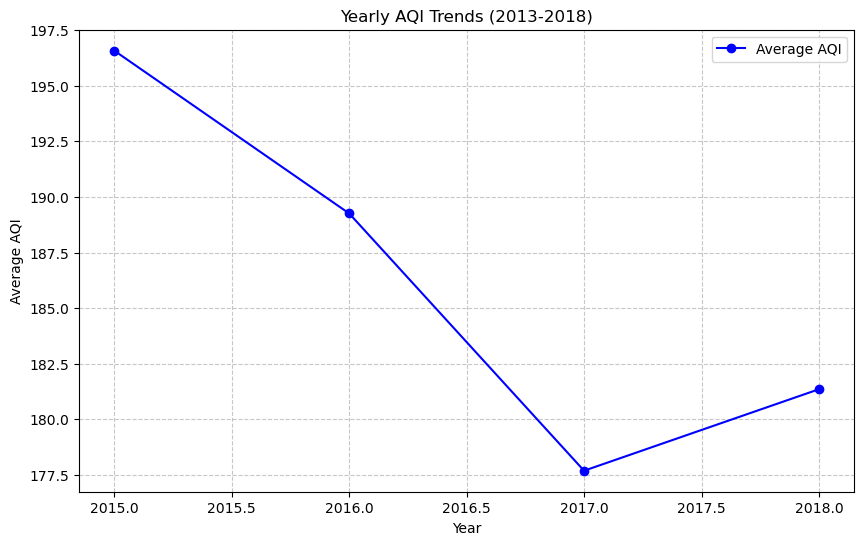

In [32]:
# Plot AQI trends over the years
import matplotlib.pyplot as plt
def plot_yearly_aqi_trends(yearly_avg_aqi):
    years = list(yearly_avg_aqi.keys())
    avg_aqi_values = list(yearly_avg_aqi.values())

    plt.figure(figsize=(10, 6))
    plt.plot(years, avg_aqi_values, marker='o', linestyle='-', color='b', label='Average AQI')
    plt.title("Yearly AQI Trends (2013-2018)")
    plt.xlabel("Year")
    plt.ylabel("Average AQI")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

# Calculate yearly average AQI
yearly_avg_aqi = calculate_yearly_avg_aqi(data, 2013, 2018)

# Plot the AQI trends
plot_yearly_aqi_trends(yearly_avg_aqi)

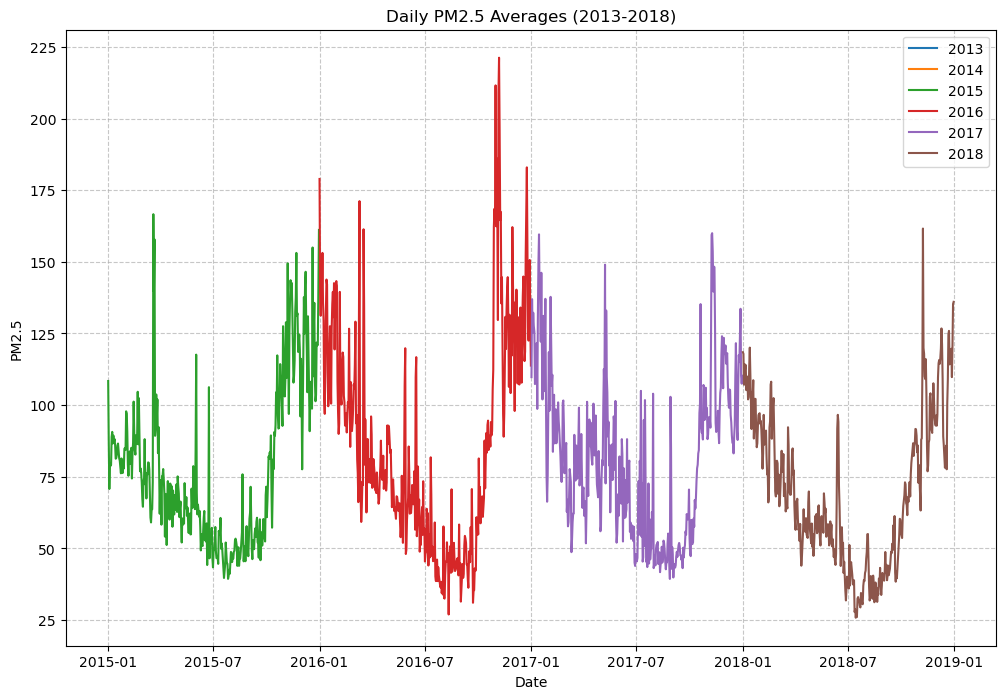

In [33]:
# Plot daily PM2.5 averages for each year
def plot_daily_pm25_trends(daily_avg):
    plt.figure(figsize=(12, 8))
    for year, series in daily_avg.items():
        plt.plot(series.index, series.values, label=f"{year}")
    plt.title("Daily PM2.5 Averages (2013-2018)")
    plt.xlabel("Date")
    plt.ylabel("PM2.5")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_daily_pm25_trends(daily_pm25_avg)